In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip3 install kneed

In [3]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [18]:
iris = sns.load_dataset('iris')

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


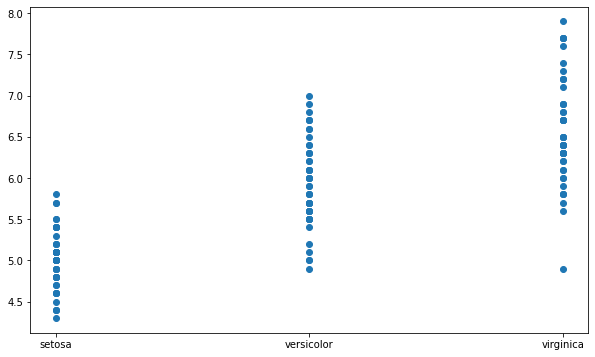

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(iris['species'], iris['sepal_length'])

In [20]:
scalar = StandardScaler()

In [21]:
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
x = iris.drop('species', axis=1)
y = iris['species']

In [27]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
scalar_iris=scalar.fit_transform(x)

In [31]:
scalar_iris[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [32]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=20,
    max_iter=800,
    random_state=56
)

In [33]:
kmeans.fit(scalar_iris)

KMeans(init='random', max_iter=800, n_clusters=4, n_init=20, random_state=56)

In [34]:
kmeans.inertia_

114.35376317214951

In [35]:
kmeans.cluster_centers_

array([[-0.72135272,  1.5070215 , -1.30157708, -1.22066912],
       [-1.30780521,  0.19950386, -1.30839757, -1.28911786],
       [ 1.06889068,  0.05759433,  0.96893325,  1.00231456],
       [-0.07723421, -0.93062132,  0.32313817,  0.23727821]])

In [36]:
kmeans.n_iter_

10

In [37]:
kmeans.labels_[:10]

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

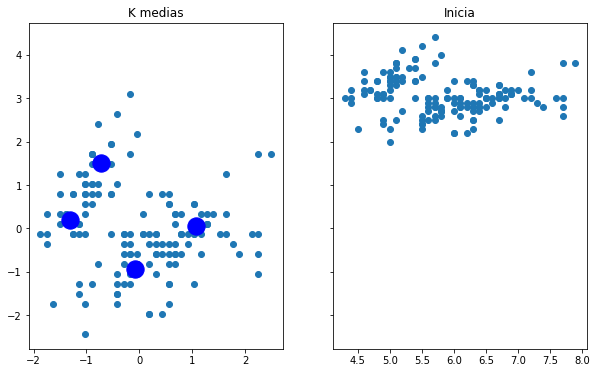

In [43]:
f,(eixo1, eixo2)=plt.subplots(1, 2, sharey=True, figsize=(10,6))
eixo1.set_title('K medias')
eixo1.scatter(scalar_iris[:,0], scalar_iris[:,1])
eixo1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='blue', label='Centroides')
eixo2.set_title('Inicia')
eixo2.scatter(x['sepal_length'], x['sepal_width'])

In [44]:
kmeans.fit(x)

KMeans(init='random', max_iter=800, n_clusters=4, n_init=20, random_state=56)

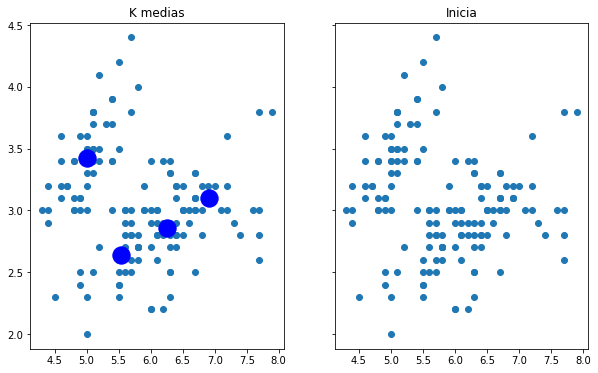

In [46]:
f,(eixo1, eixo2)=plt.subplots(1, 2, sharey=True, figsize=(10,6))
eixo1.set_title('K medias')
eixo1.scatter(x['sepal_length'], x['sepal_width'])
eixo1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='blue', label='Centroides')
eixo2.set_title('Inicia')
eixo2.scatter(x['sepal_length'], x['sepal_width'])

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
print('Matriz de Confusão', confusion_matrix(x, kmeans.fit))

TypeError: ignored